In [81]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import pprint
%matplotlib inline

### Challenge 1

Generate (fake) data that is linearly related to log(x).

You are making this model up. It is of the form B0 + B1*log(x) + epsilon. (You are making up the parameters.)

Simulate some data from this model.

Then fit two models to it:

quadratic (second degree polynomial)
logarithmic (log(x))
(The second one should fit really well, since it has the same form as the underlying model!)



In [68]:
# create model function

def create_dataset_log(B_o, B_1, std_dev):
    '''
    Outputs a data set for X and y with form B0 + B1*log(x) + epsilon
    '''
    X = np.linspace(1, 1000, 100)
    e = np.random.randn(100) * std_dev
    y = B_o + B_1 * np.log(X) + e
    return X, y

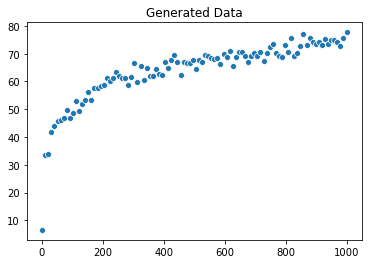

In [69]:
# create x values and apply model function

X, y = create_dataset_log(5, 10, 2)
sns.scatterplot(X,y)
plt.title('Generated Data')
X = X.reshape(-1,1)

In [70]:
# Fit quadratic model
quad_lr = LinearRegression()
X_2nd_quad = X**2
quad_model = quad_lr.fit(X_2nd_quad, y)

In [71]:
# Fit logarithmic model
log_lr = LinearRegression()
X_log = np.log(X)
log_model = log_lr.fit(X_log, y)

In [72]:
print('Quadratic R^2:', quad_model.score(X_2nd_quad, y) ,'\n'
      'Logarithmic R^2:', log_model.score(X_log, y))

Quadratic R^2: 0.525703132986 
Logarithmic R^2: 0.966992698031


### Challenge 2
Generate (fake) data from a model of the form B0 + B1*x + B2*x^2 + epsilon. (You are making up the parameters.)

Split the data into a training and test set.

Fit a model to your training set. Calculate mean squared error on your training set. Then calculate it on your test set.

(You could use sklearn.metrics.mean_squared_error.)

In [76]:
# create model function

def create_dataset_poly(B_o, B_1, B_2, std_dev):
    '''
    Outputs a data set for X and y with form B0 + B1x + B2x^2 + epsilon
    '''
    X = np.linspace(1, 1000, 100)
    e = np.random.randn(100) * std_dev
    y = B_o + (B_1*X) + (B_2*X**2)  + e
    return X, y

In [83]:
X, y = create_dataset_poly(5, 10, 15, 2)
X = X.reshape(-1,1)

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [85]:
lr = LinearRegression()
lr.fit(X_train,y_train)

pred_y_train = lr.predict(X_train)
pred_y_test = lr.predict(X_test)

In [89]:
print('Train MSE:', mean_squared_error(y_train, pred_y_train), '\n'
      'Test MSE:', mean_squared_error(y_test, pred_y_test))

Train MSE: 1.37951108586e+12 
Test MSE: 1.1406083386e+12
